In [ ]:
#reading in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
data = pd.read_csv('master.csv')
pd.set_option('display.max_rows',160)

In [2]:
#quick exploration of the suicide data set
print(len(data))
data.head(20)


27820


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
# drop all 2016 rows, need to explain why
data = data[data['year']!= 2016]
# data[data['year']!= 2016]

The suicide dataset consists of 27820 rows and 12 columns of different data types. In first glance it seems that not all of them are relevant to to the goals of this analysis. In the next lines we'll take a closer look at the columns and start to prepare the data for analysis.

In [1]:
# data[data['country']=='Republic of Korea']='South Korea'
# data[data['country']=='United Arab Emirates']='Emirates'
#

In [5]:
#number of countries in the data
len(data['country'].unique())

100

Data Clening

In [6]:
#number of nans in the data
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19296
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

The only column containing Nan values is the 'HDI for year' column which consists mostly of NaNs,so i will drop it. Further, I will also not use the 'country-year' column i will drop it as well. 

In [7]:
#droping the columns
data = data.drop(['HDI for year','country-year'],axis=1)

Except for these two small modifications the data seems quite clean and prepared for initial analysis, so i'll dive straight into deeper exploration of the columns. Let's begin by plotting the trend over time of the general suicide rate.

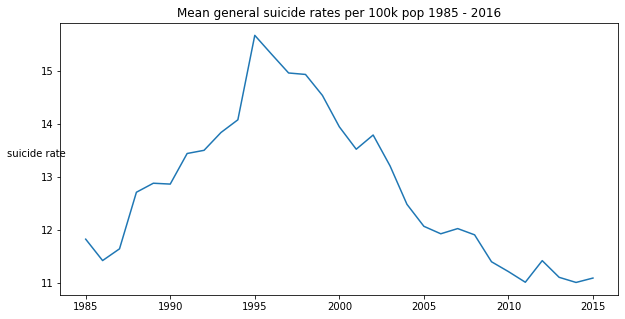

In [8]:
#group the data by the 'year'column and check the overall mean of suicide rates
grouped =data.groupby(['year'])
aggregated_mean = grouped['suicides/100k pop'].mean()
plt.figure(figsize=(10,5))
plt.plot(aggregated_mean)
plt.title('Mean general suicide rates per 100k pop 1985 - 2016')
plt.ylabel('suicide rate',rotation=0);

It seems that the mean general suicide rate is quite variant, with a peak of more than 16 in the mid 90's and a low of 11 at 2011. Next, let's check for the countries that have the highest suicide rates.

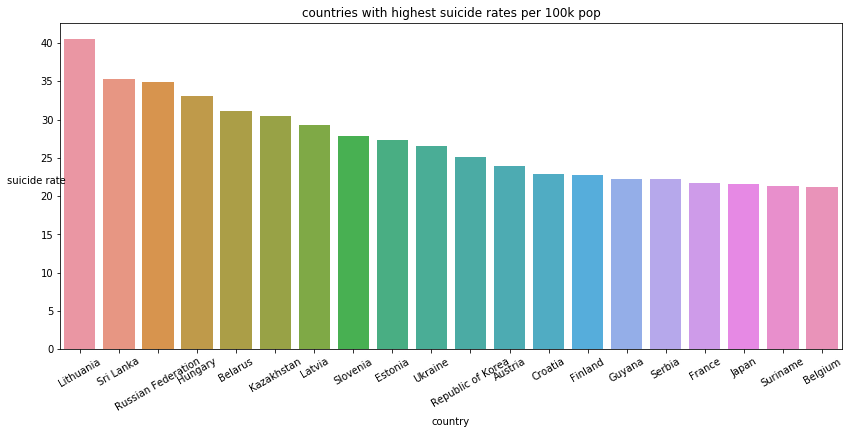

In [138]:
country_grouped = data.groupby(['country'])
highest_country_index = country_grouped['suicides/100k pop'].mean().sort_values(ascending=False).head(20).index
highest_country_values = country_grouped['suicides/100k pop'].mean().sort_values(ascending=False).head(20).values
plt.figure(figsize=(14,6))
sns.barplot(highest_country_index,highest_country_values)
plt.xticks(rotation=30)
# highest_country_mean.plot.bar(figsize=(10,5))
plt.title('countries with highest suicide rates per 100k pop')
plt.ylabel('suicide rate',rotation=0);

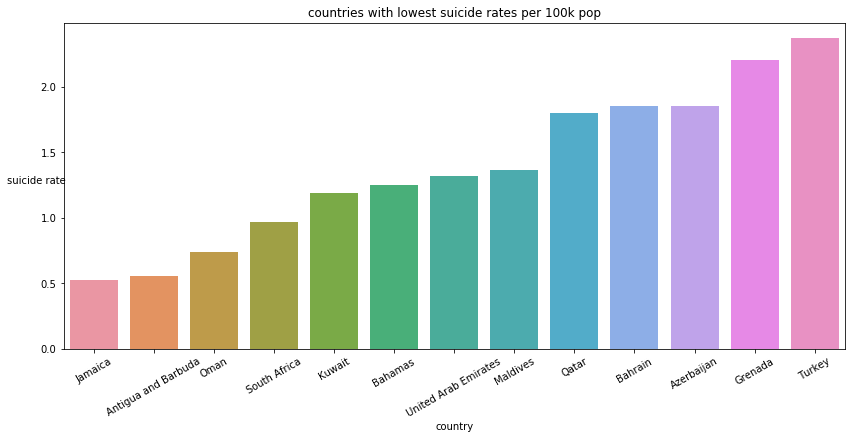

In [139]:
#countries with the lowest suicide rates
lowest_country_index = country_grouped['suicides/100k pop'].mean().sort_values().iloc[2:15].index#to exclude countries with rates 0
lowest_country_values = country_grouped['suicides/100k pop'].mean().sort_values().iloc[2:15].values
plt.figure(figsize=(14,6))
sns.barplot(lowest_country_index,lowest_country_values)
# lowest_country_mean.plot.bar(figsize=(14,6))
plt.title('countries with lowest suicide rates per 100k pop')
plt.xticks(rotation=30,fontsize=10)
plt.ylabel('suicide rate',rotation=0);

In [11]:
country_grouped['suicides/100k pop'].mean().sort_values().iloc[3:15]

country
Antigua and Barbuda     0.552901
Oman                    0.736111
South Africa            0.964542
Kuwait                  1.186433
Bahamas                 1.247391
United Arab Emirates    1.317917
Maldives                1.367333
Qatar                   1.795952
Bahrain                 1.854127
Azerbaijan              1.855417
Grenada                 2.203333
Turkey                  2.371071
Name: suicides/100k pop, dtype: float64

So Lithuania is at the top of the chart, along many other eastern european countries. 
After getting a general overview of the suicide rate let's begin asking more specific questions about it's relation to other factors. 

Do richer countries have higher suicide rates?

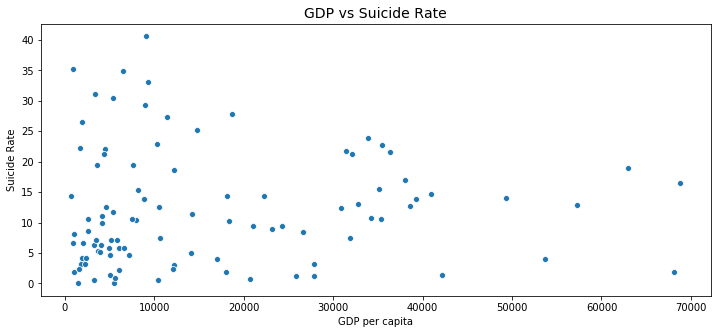

In [12]:
#plotting scatter plot to view corrolation between suicide rates and gdp per capita
gdp = country_grouped['gdp_per_capita ($)'].mean()
suicide_rate = country_grouped['suicides/100k pop'].mean()
plt.figure(figsize=(12,5))

sns.scatterplot(x=gdp,y=suicide_rate)
plt.title('GDP vs Suicide Rate',fontsize=14);
plt.xlabel('GDP per capita')
plt.ylabel('Suicide Rate');

Turns out that there is no clear liniar connection between the variables. So there is no easy answer to our question based on the plot. It seems that many of the poorer countries do have low suicide rates and that the concentration on the lower area of the y axis dwindles the farther right you go. One can say that richer countries, with gdp per capita higher than 30000, on average almost never scale than 10 or more than 25 suicides per 100000. Compared to that, the suicide rate of poorer countries has a much greater standard deviation, with values ranging from almost 0 to more than 40.

Next, we'll dig dipper into the gdp-suicde relation and ask: how does the suicide rate change when the country becomes richer?

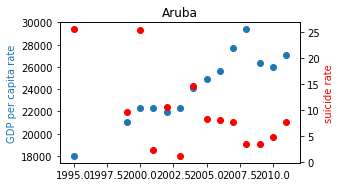

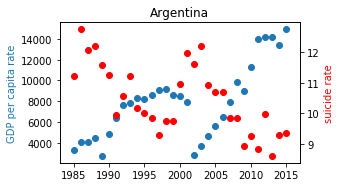

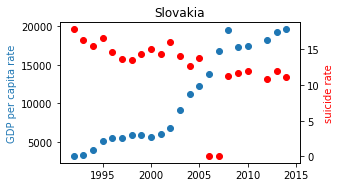

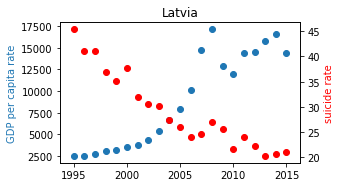

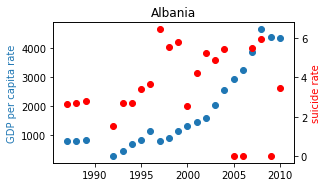

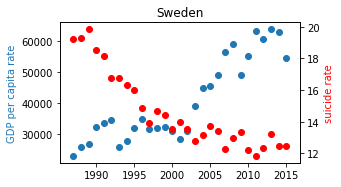

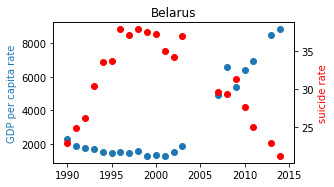

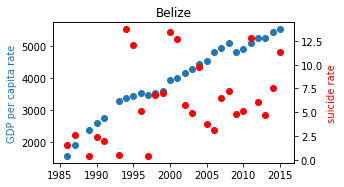

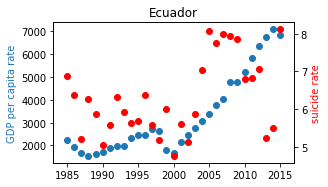

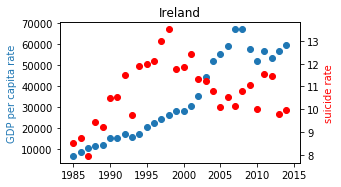

In [13]:
#code to plot 
#list of countries in the data
countries = data['country'].unique()
#generate 20 random integers for the countries that should be plotted
index = np.random.randint(0,101,10).tolist()
for i in index:
    #setting the plot axes
    year_suicide = data[data['country']==countries[i]].groupby(['year'])['suicides/100k pop'].mean()
    gdp_year = data[data['country']==countries[i]].groupby('year')['gdp_per_capita ($)'].mean()
    year = data[data['country']==countries[i]]['year'].unique()
    fig = plt.figure(figsize=(25,15))
    #setting the left axis
    ax1 = fig.add_subplot(5,5,index.index(i)+1)
    ax1.scatter(x=year,y=gdp_year, color = 'tab:blue')
    ax1.set_ylabel('GDP per capita rate',color='tab:blue')
    ax1.set_title(countries[i])
    #setting the right right axis
    ax2 = ax1.twinx()
    ax2.scatter(x = year,y=year_suicide,color='red')
    ax2.set_ylabel('suicide rate',color='red')

From the plots above it seems that when we sample the countries randomly increased GDP per capita does not necessarily entail a drop in suicide rate, or vice versa. However, rerunning the cell suggests that some countries do exibit a strong negative corroltaion, meaning that increase in GDP is accompanied by a decrease in suicide rate. It might be interesting to separate the cases that show a positive corrolation from those with negative or no corrolation.

In [14]:
#next lines compute the corrolation between gdp per capita and suicide rate for each country
from scipy.stats.stats import pearsonr 
#list of countries in the data
countries = data['country'].unique()
#generate 20 random integers for the countries that should be plotted
corr_dic = {}
for i in countries:
    year_suicide = data[data['country']==i].groupby(['year'])['suicides/100k pop'].mean()
    gdp_year = data[data['country']==i].groupby('year')['gdp_per_capita ($)'].mean()
    #include only countries that have enough data points to compute corrolation
    if len(year_suicide)>3 and len(gdp_year)>3:
        corr = pearsonr(gdp_year,year_suicide)[0]
        corr_dic[i]=corr
        
corr_dic

{'Albania': -0.07451516298554628,
 'Antigua and Barbuda': 0.10386778112980297,
 'Argentina': -0.8044852991345344,
 'Armenia': -0.13274649724684914,
 'Aruba': -0.5586249442188514,
 'Australia': -0.6681724709304107,
 'Austria': -0.913322519962424,
 'Azerbaijan': -0.10985486272938508,
 'Bahamas': 0.039205804136475626,
 'Bahrain': -0.15709290443676388,
 'Barbados': -0.7339211531006112,
 'Belarus': -0.6870748863723892,
 'Belgium': -0.8980483963994337,
 'Belize': 0.40519258772731065,
 'Brazil': 0.5715304815387154,
 'Bulgaria': -0.893410675451622,
 'Canada': -0.8254787766733267,
 'Chile': 0.6853206205623319,
 'Colombia': 0.2976588476872459,
 'Costa Rica': -0.09113109303911766,
 'Croatia': -0.8736981657357964,
 'Cuba': -0.8009748588878781,
 'Cyprus': 0.7715185626076656,
 'Czech Republic': -0.8697786921186307,
 'Denmark': -0.8185924663461279,
 'Ecuador': 0.4364737547271442,
 'El Salvador': -0.6573915677511929,
 'Estonia': -0.8675504625197559,
 'Fiji': 0.008411499416983964,
 'Finland': -0.831699

In [15]:
#compute corrolation mean
corrolation_mean = np.mean(list(corr_dic.values()))
print('average general corrolation:',corrolation_mean)

average general corrolation: -0.32436342792783646


The average corrolation result confirms that the general trend is negative, even if just a weak one. Let's now seperate and plot the negative and positive corrolations. 

In [16]:
#create dictionaries with country name as key and corrolation as value
negative_corr = dict((k,v) for k, v in corr_dic.items() if v<-0.6)
positive_corr = dict((k,v) for k, v in corr_dic.items() if v>0.6)
no_corr = dict((k,v) for k, v in corr_dic.items() if -0.6<v<0.6)

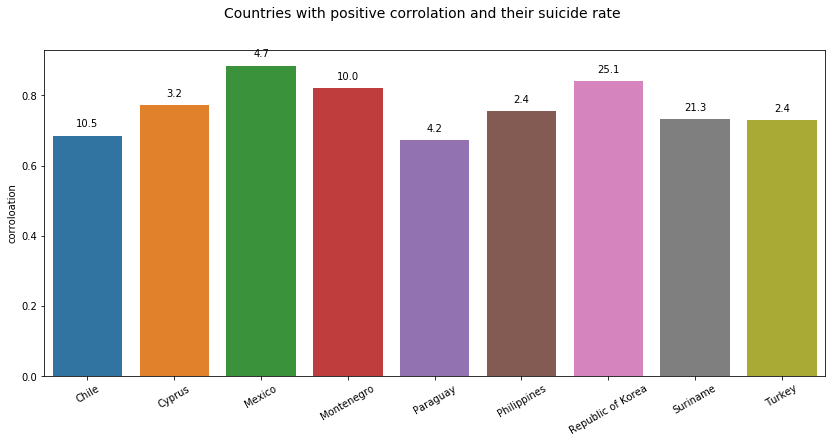

In [17]:
plt.figure(figsize=(14,6))
ax = sns.barplot(list(positive_corr.keys()),list(positive_corr.values()))
plt.xticks(rotation=30)
plt.suptitle('Countries with positive corrolation and their suicide rate', size=14)
plt.ylabel('corroloation',fontsize=10)
# for i in list(positive_corr.keys()):
#to get the average suicide rate of the countries in this group
values = country_grouped.mean()['suicides/100k pop'].loc[list(positive_corr.keys())].values.tolist()
round_values = [round(elem, 1) for elem in values]

rects = ax.patches
labels = round_values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.02, label,
            ha='center', va='bottom')

In [18]:
values = country_grouped.mean()['suicides/100k pop'].loc[list(positive_corr.keys())].values.tolist()

rounded = [round(elem, 1) for elem in values]
rounded

[10.5, 3.2, 4.7, 10.0, 4.2, 2.4, 25.1, 21.3, 2.4]

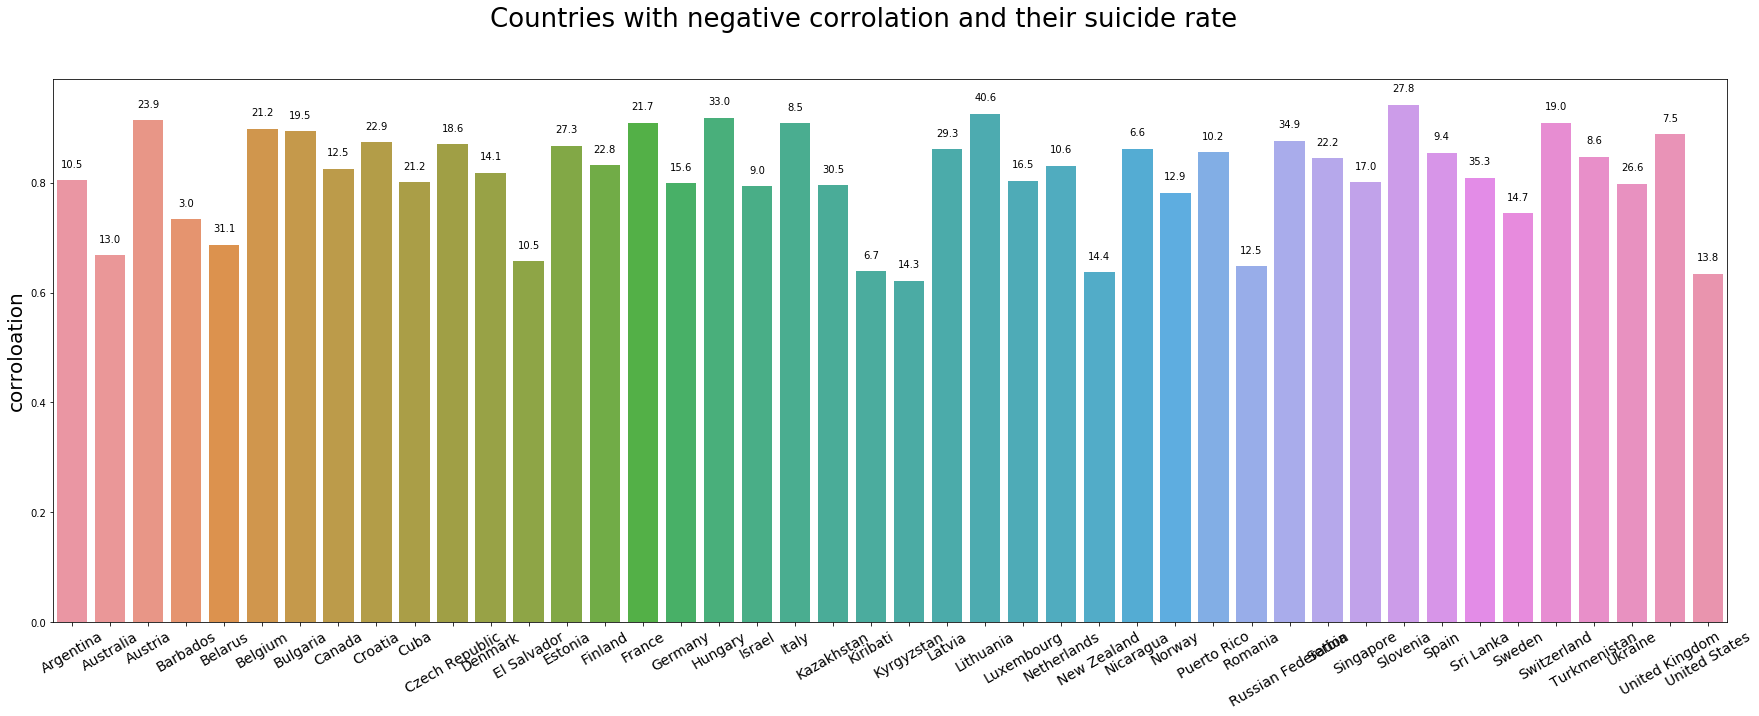

In [19]:
plt.figure(figsize=(30,10))
ax = sns.barplot(list(negative_corr.keys()),np.abs(list(negative_corr.values())))
plt.xticks(rotation=30,fontsize=14)
plt.suptitle('Countries with negative corrolation and their suicide rate', size=26)
plt.ylabel('corroloation',fontsize=20)
values1 = country_grouped.mean()['suicides/100k pop'].loc[list(negative_corr.keys())].values.tolist()
round_values1 = [round(elem, 1) for elem in values1]

rects1 = ax.patches
labels1 = round_values1
for rect, label in zip(rects1, labels1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.02, label,
            ha='center', va='bottom')


Notice that in the second plot the bars represent negative values. A few things can be infered from the plots above. First, non of the countries with positive corrolation is a western country. Most of those countries seem to have both relatively low gdp per capita and suicde rate. On the other hand, most of the rich western countries have quite a strong negative corrolation between gdp and suicide rate, yet their base suicide rate tends to be higher. To get a clearer picture I'll scatter the corrolation vs gdp of each country.

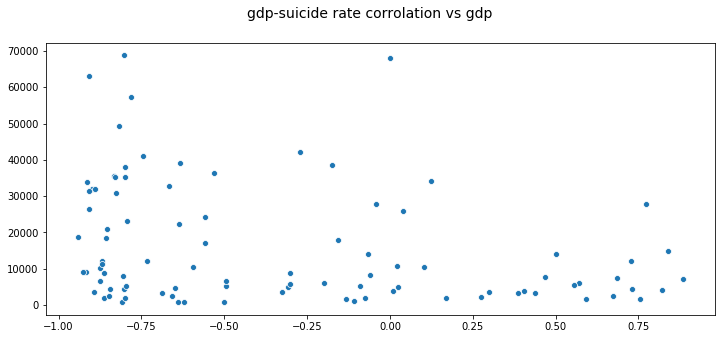

In [20]:
gdp_mean = data.groupby(['country']).mean()['gdp_per_capita ($)']
#convert series to dictionaey to easily approach values
gdp_dic = dict(gdp_mean)

corr_gdp_dic={}
for i in countries:
    if i in corr_dic.keys():
        corr_gdp_dic[corr_dic[i]] = gdp_dic[i]
plt.figure(figsize=(12,5))
plt.suptitle('gdp-suicide rate corrolation vs gdp', size=14)
sns.scatterplot(list(corr_gdp_dic.keys()),list(corr_gdp_dic.values()));

The last plot shows that, as stated above, almost all rich countries have a negative gdp-suicide rate corrolation. Meaning that as the rich countries get richer their suicide rate tends to decrease. This claim however must be qualified, since there is also a very strong positive corrolation among these countries between time and gdp rate. Therefore, eventhough a strong corrolation does exist between gdp and suicide rate, the decline in suicide rates could also be attributed to other variables I did not account for.The poorer countries on the other hand do not share any common corrolation properties, as they spread over the entire x axis above. This might be explained by the notion that rich countries tend to have more in common (mainly north american or west europen countries, with similar political regimes, economic systems etc), but not so with poor countries. 

Next, I'll explore the age and sex variables in attempt to find out if a certain age groups or sex is more likely to commit suicide. 


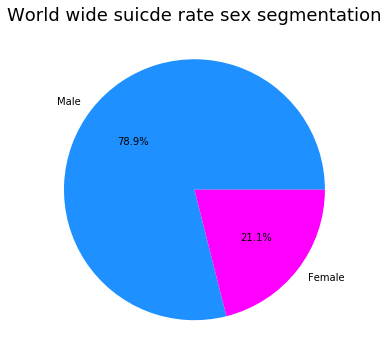

In [21]:
female = data.groupby(['sex']).mean()['suicides/100k pop'].loc['female']
male = data.groupby(['sex']).mean()['suicides/100k pop'].loc['male']

#plot chart
sizes=[male,female]
labels = 'Male','Female'
colors= ['dodgerblue','magenta']
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('World wide suicde rate sex segmentation',fontsize=18)

ax1.pie(sizes,labels=labels,autopct='%1.1f%%',colors=colors);

Text(0.5, 1.4, 'United States')

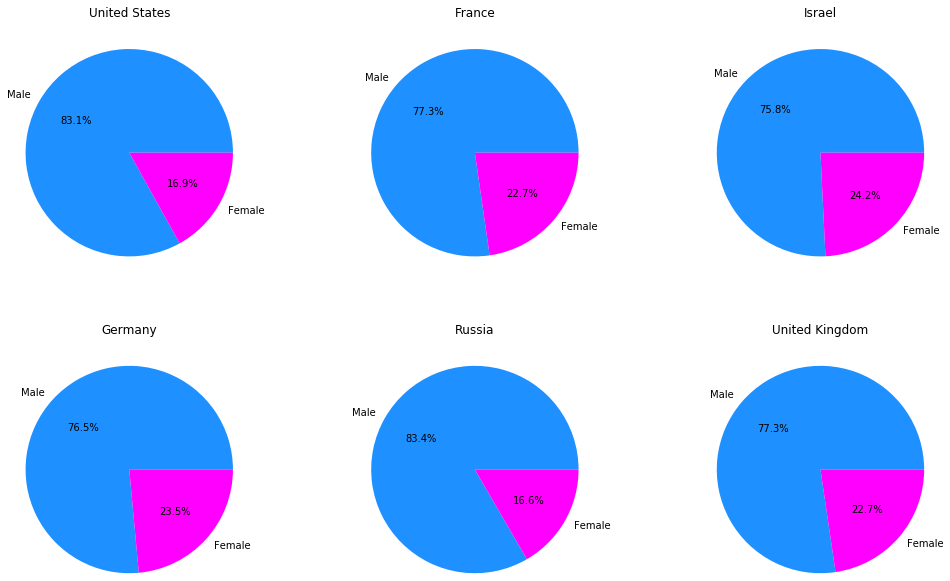

In [132]:
female = data.groupby(['country','sex']).mean().loc['Germany'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['Germany'].loc['male']['suicides/100k pop']
sizes=[male,female]
labels = 'Male','Female'
colors= ['dodgerblue','magenta']
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%',colors=colors)
ax1.set_title('Germany',y=1.4)

female = data.groupby(['country','sex']).mean().loc['Russian Federation'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['Russian Federation'].loc['male']['suicides/100k pop']
sizes=[male,female]
ax2 = fig.add_axes([0.8, .0, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%', colors=colors)
ax2.set_title('Russia',y=1.4)

female = data.groupby(['country','sex']).mean().loc['United Kingdom'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['United Kingdom'].loc['male']['suicides/100k pop']
sizes=[male,female]
ax2 = fig.add_axes([1.6, .0, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%', colors=colors)
ax2.set_title('United Kingdom',y=1.4)

female = data.groupby(['country','sex']).mean().loc['France'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['France'].loc['male']['suicides/100k pop']
sizes=[male,female]
ax2 = fig.add_axes([0.8, 1.1, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%', colors=colors)
ax2.set_title('France',y=1.4)

female = data.groupby(['country','sex']).mean().loc['Israel'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['Israel'].loc['male']['suicides/100k pop']
sizes=[male,female]
ax2 = fig.add_axes([1.6, 1.1, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%', colors=colors)
ax2.set_title('Israel',y=1.4)

female = data.groupby(['country','sex']).mean().loc['United States'].loc['female']['suicides/100k pop']
male = data.groupby(['country','sex']).mean().loc['United States'].loc['male']['suicides/100k pop']
sizes=[male,female]
ax2 = fig.add_axes([0, 1.1, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, radius = 1.8,autopct='%1.1f%%', colors=colors)
ax2.set_title('United States',y=1.4)




All the countries above seem to have close to world average male-female suicide proportions. Are there any countries that have significantly different proportions?

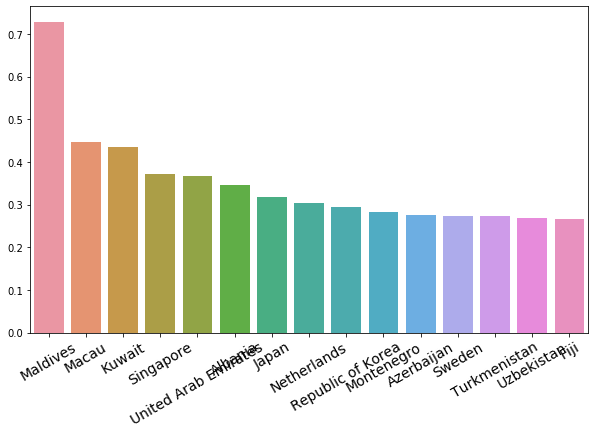

In [23]:
# create dictionary with counutries and their gender suicide proportions
female_dic={}
for i in countries:
    female = data.groupby(['country','sex']).mean().loc[i].loc['female']['suicides/100k pop']
    male = data.groupby(['country','sex']).mean().loc[i].loc['male']['suicides/100k pop']
    if female>0:
        female_rate = female/(female+male)
        female_dic[i] = female_rate
    else: continue
highest_rates= pd.Series(female_dic).sort_values(ascending=False).head(15)

plt.figure(figsize =(10,6))
plt.xticks(rotation=30,fontsize=14)
sns.barplot(x=highest_rates.index,y=highest_rates.values);

#still have to change the names of korea emirates

#plot countries with highest women rate suicide
# sorted_rates.index
    

In [24]:
data.groupby(['country','sex']).mean()

year  suicides_no    population  \
country                      sex                                              
Albania                      female  1999.227273     5.250000  2.371333e+05   
                             male    1999.227273     9.674242  2.350293e+05   
Antigua and Barbuda          female  1999.481481     0.006173  6.414660e+03   
                             male    1999.481481     0.061728  5.870698e+03   
Argentina                    female  2000.000000    98.526882  2.848001e+06   
                             male    2000.000000   343.510753  2.721813e+06   
Armenia                      female  2002.333333     3.340278  2.719857e+05   
                             male    2002.333333     9.423611  2.484875e+05   
Aruba                        female  2004.285714     0.202381  7.850488e+03   
                             male    2004.285714     1.000000  7.145667e+03   
Australia                    female  1999.833333    85.144444  1.517186e+06   
                             male    1999.833333   304.361111  1.496024e+06   
Austria                      female  2000.000000    69.354839  6.584874e+05   
                             male    2000.000000   193.397849  6.123108e+05   
Azerbaijan                   female  1997.625000     4.291667  5.969104e+05   
                             male    1997.625000    12.958333  5.675719e+05   
Bahamas                      female  2001.521739     0.101449  2.435767e+04   
                             male    2001.521739     0.572464  2.315717e+04   
Bahrain                      female  2002.809524     0.634921  5.170168e+04   
                             male    2002.809524     3.039683  8.126598e+04   
Barbados                     female  1999.240000     0.220000  2.166425e+04   
                             male    1999.240000     0.960000  1.976035e+04   
Belarus                      female  2001.095238    79.380952  8.384330e+05   
                             male    2001.095238   395.952381  7.280138e+05   
Belgium                      female  2000.000000    96.838710  8.347367e+05   
                             male    2000.000000   240.586022  7.959225e+05   
Belize                       female  2001.250000     0.303571  1.867172e+04   
                             male    2001.250000     1.767857  1.876289e+04   
Bosnia and Herzegovina       female  2012.500000     5.833333  3.125404e+05   
                             male    2012.500000    20.666667  2.980830e+05   
Brazil                       female  2000.000000   263.521505  1.325527e+07   
                             male    2000.000000   954.827957  1.285276e+07   
Bulgaria                     female  1999.500000    55.377778  6.601516e+05   
                             male    1999.500000   146.777778  6.284037e+05   
Cabo Verde                   female  2011.000000     0.833333  3.794533e+04   
                             male    2011.000000     6.166667  3.741783e+04   
Canada                       female  1999.000000   138.988506  2.402280e+06   
                             male    1999.000000   479.178161  2.345146e+06   
Chile                        female  2000.000000    36.741935  1.165246e+06   
                             male    2000.000000   183.123656  1.133814e+06   
Colombia                     female  2000.000000    60.983871  3.020183e+06   
                             male    2000.000000   224.392473  2.936494e+06   
Costa Rica                   female  1999.500000     5.438889  2.828814e+05   
                             male    1999.500000    32.294444  2.847674e+05   
Croatia                      female  2005.000000    35.769841  3.638067e+05   
                             male    2005.000000   105.071429  3.359021e+05   
Cuba                         female  2003.500000    81.076389  8.730674e+05   
                             male    2003.500000   206.548611  8.754752e+05   
Cyprus                       female  2008.071429     0.916667  6.626690e+04   
               

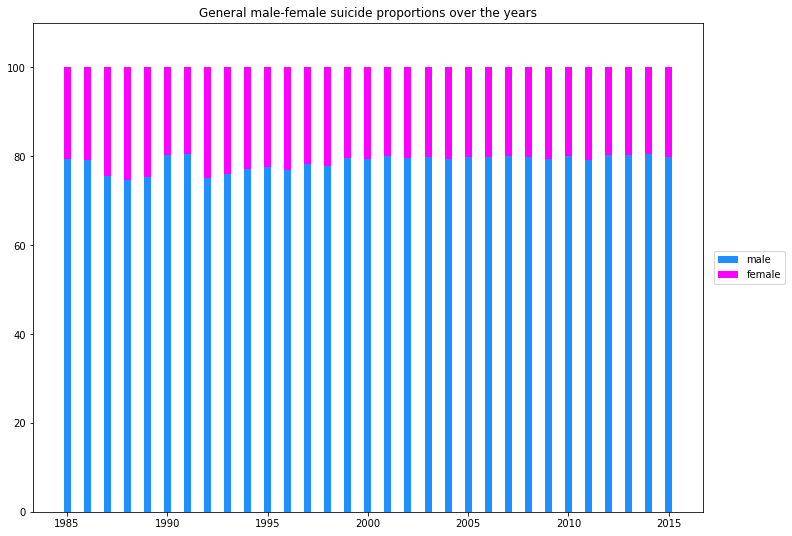

In [25]:
#index by male amd female
female = data.groupby(['year','sex']).mean().xs('female',level='sex')['suicides/100k pop']
male = data.groupby(['year','sex']).mean().xs('male',level='sex')['suicides/100k pop']
sex_sum = female+male
#normalization
x = data['year'].unique()
male_normalized = (male/sex_sum)*100
female_normalized = (female/sex_sum)*100
female_values = female_normalized.values
male_values = male_normalized.values
plt.figure(figsize = (12,9))
plt.bar(x=x, height = male_values,width = 0.35,label='male',color='dodgerblue')
plt.bar(x,height=female_values,bottom=male_values,width=0.35,label='female',color='magenta')
plt.title('General male-female suicide proportions over the years')

plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

The plots above suggest that some countries do have significantly different proportions than the norm. Moreover, the average proportions seem to be quite stable along the years sampled. 

In [26]:
data.groupby(['age']).mean()['suicides/100k pop']

age
15-24 years     8.957182
25-34 years    12.199479
35-54 years    14.958887
5-14 years      0.620041
55-74 years    16.163380
75+ years      23.976614
Name: suicides/100k pop, dtype: float64

Moving to the age group, last variable w'll explore, let's check the age suicide distribution

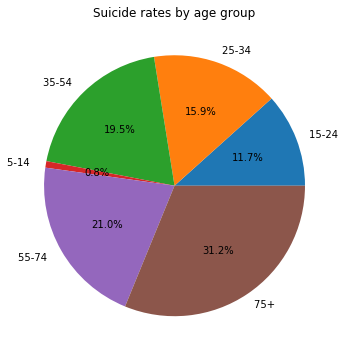

In [27]:
#remove the word 'years' from the strings in column
data['age'] = data['age'].str.replace('years','')
suicide_age = data.groupby(['age']).mean()['suicides/100k pop']
#creating the age-suicide rate dictionary for the pie chart
ages = suicide_age.index
age_dic = {}
for i in ages:
    age_dic[i] = data.groupby(['age']).mean()['suicides/100k pop'].loc[i]
age_dic
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(list(age_dic.values()),labels=list(age_dic.keys()),autopct='%1.1f%%')
plt.title('Suicide rates by age group');

In [28]:
data.groupby(['age']).mean().index

Index(['15-24 ', '25-34 ', '35-54 ', '5-14 ', '55-74 ', '75+ '], dtype='object', name='age')

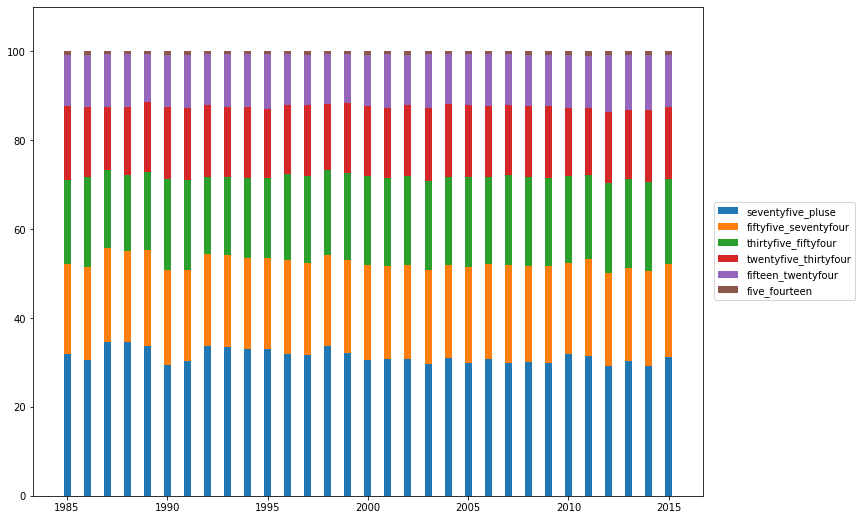

In [93]:
grouped = data.groupby(['year','age'])
five_fourteen = grouped.mean().xs('5-14 ',level='age')['suicides/100k pop'].values
fifteen_twentyfour =grouped.mean().xs('15-24 ',level='age')['suicides/100k pop'].values
twentyfive_thirtyfour = grouped.mean().xs('25-34 ',level='age')['suicides/100k pop'].values
thirtyfive_fiftyfour = grouped.mean().xs('35-54 ',level='age')['suicides/100k pop'].values
fiftyfive_seventyfour = grouped.mean().xs('55-74 ',level='age')['suicides/100k pop'].values
seventyfive_plus = grouped.mean().xs('75+ ',level='age')['suicides/100k pop'].values
age_sum = five_fourteen+fifteen_twentyfour+twentyfive_thirtyfour+thirtyfive_fiftyfour+seventyfive_plus+fiftyfive_seventyfour
one = five_fourteen/age_sum*100
two = fifteen_twentyfour/age_sum*100
three = twentyfive_thirtyfour/age_sum*100
four = thirtyfive_fiftyfour/age_sum*100
five = fiftyfive_seventyfour/age_sum*100
six = seventyfive_plus/age_sum*100
plt.figure(figsize = (12,9))
plt.bar(x, height = six,width = 0.35,label='seventyfive_pluse')
plt.bar(x,height=five,bottom=six,width=0.35,label='fiftyfive_seventyfour')
plt.bar(x,height=four,bottom=six+five,width=0.35,label='thirtyfive_fiftyfour')
plt.bar(x,height=three,bottom=six+five+four,width=0.35,label='twentyfive_thirtyfour')
plt.bar(x,height=two,bottom=six+five+four+three,width=0.35,label='fifteen_twentyfour')
plt.bar(x,height=one,bottom=six+five+four+three+two,width=0.35,label='five_fourteen')

plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)


Are there any differences between male and female suicide - age distributions?

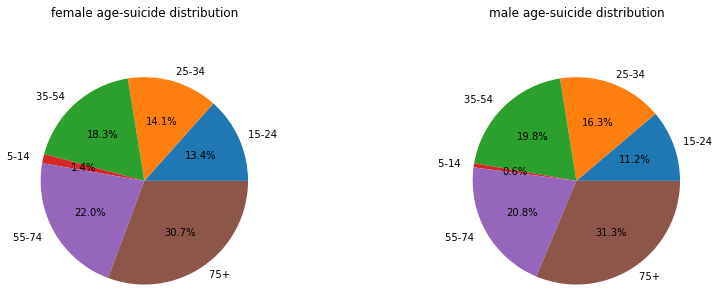

In [113]:
#remove the word 'years' from the strings in column
data['age'] = data['age'].str.replace('years','')
female_age = data.groupby(['age','sex']).mean().xs('female',level='sex')['suicides/100k pop']
male_age = data.groupby(['age','sex']).mean().xs('male',level='sex')['suicides/100k pop']
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(female_age.values, labels=female_age.index, radius = 1.8,autopct='%1.1f%%')
ax1.set_title('female age-suicide distribution',y=1.6)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax2.pie(male_age.values, labels=male_age.index, radius = 1.8,autopct='%1.1f%%')
ax2.set_title('male age-suicide distribution',y=1.6);

